In [ ]:
from google.colab import drive
drive.mount('/data/')
data_dir = '/data/My Drive/Colab Notebooks/Experiment'
!ls '/data/My Drive/Colab Notebooks/Experiment'
!pip install matplotlib

Drive already mounted at /data/; to attempt to forcibly remount, call drive.mount("/data/", force_remount=True).
diamonds.csv  Iris.csv	m_data.csv  w_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv(data_dir+'/diamonds.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df['color_int'] = df['color'].astype('category').cat.codes

transform = {
    'Ideal':0, 'Premium':1, 'Good':2, 'Very Good':3, 'Fair':4
}
df['cut_int']=df['cut'].apply(lambda x: transform[x])

transform_clarity ={
    'SI2':6, 'SI1':5, 'VS1':3, 'VS2':4, 'VVS2':2, 'VVS1':1, 'I1':7, 'IF':0
}
df['clarity_int']=df['clarity'].apply(lambda x: transform_clarity[x])

In [ ]:
df.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,color_int,cut_int,clarity_int
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,0,6
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1,5


In [ ]:
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z,color_int,cut_int,clarity_int
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208,-0.095098,-0.084898,-0.208598
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.291437,0.114426,0.352841
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.047279,0.169916,0.067384
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.026465,0.381988,0.160327
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.172511,0.049421,0.146800
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.270287,0.105361,0.371999
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.263584,0.105319,0.358420
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.268227,0.126726,0.366952
color_int,-0.095098,0.291437,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227,1.000000,0.016109,-0.025631
cut_int,-0.084898,0.114426,0.169916,0.381988,0.049421,0.105361,0.105319,0.126726,0.016109,1.000000,0.152860


In [ ]:
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm  
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train, test = train_test_split(df, test_size = 0.3)

print(train.shape)
print(test.shape)

(37758, 14)
(16182, 14)


In [ ]:
train_X = train[['carat', 'cut_int', 'clarity_int', 'color_int']]
train_y = train.price

test_X = test[['carat', 'cut_int', 'clarity_int', 'color_int']]
test_y = test.price

In [ ]:
train_y.head(2)

48874    2036
13571    5555
Name: price, dtype: int64

In [ ]:
def classify(x):
  return((x > 2000))

y_train_classify = train_y.apply(classify)
y_test_classify = test_y.apply(classify)

Logistic Regression Model

In [ ]:
model_re = LinearRegression()

X = df[['carat','color_int','cut_int','clarity_int']]
y = df.price

model_re.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model = LogisticRegression()
model.fit(train_X,y_train_classify)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
import sklearn.metrics
sklearn.metrics.confusion_matrix(y_test_classify, model.predict(test_X))

array([[7141,  190],
       [ 191, 8660]])

In [ ]:
precision = 7120/(7120+177)
recall = 8708/(8708+177)
f_score = 2* (precision*recall)/(precision+recall)
f_score

0.9779063154388606

In [ ]:
errors = test_y - model_re.predict(test_X)

e = pd.DataFrame(errors)
e[e['price']>2500].count()

price    390
dtype: int64

Decision Tree

In [ ]:
from sklearn import tree
clf_re = tree.DecisionTreeRegressor()

X = df[['carat','color_int','cut_int','clarity_int']]
y = df.price

clf_re.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(train_X, y_train_classify)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
sklearn.metrics.confusion_matrix(y_test_classify, clf.predict(test_X))

array([[7199,  132],
       [ 192, 8659]])

In [ ]:
precision = 7199/(7199+192)
recall = 8659/(8659+132)
f_score = 2* (precision*recall)/(precision+recall)
f_score

0.9794728805524242

In [ ]:
errors = test_y - clf_re.predict(test_X)

e = pd.DataFrame(errors)
e[e['price']>2500].count()

price    66
dtype: int64

KNN 

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f8b874de710>,
 <a list of 10 Text major ticklabel objects>)

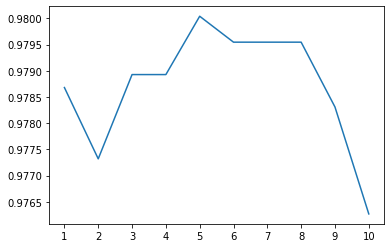

In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model_k=KNeighborsClassifier(n_neighbors=i) 
    model_k.fit(train_X,y_train_classify)
    prediction=model_k.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test_classify)))
plt.plot(a_index, a)
plt.xticks(x)

In [ ]:
model_k_re = KNeighborsRegressor()

X = df[['carat','color_int','cut_int','clarity_int']]
y = df.price

model_k_re.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
model_k=KNeighborsClassifier(n_neighbors=5) 
model_k.fit(train_X,y_train_classify)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
sklearn.metrics.confusion_matrix(y_test_classify, model_k.predict(test_X))

array([[7179,  152],
       [ 171, 8680]])

In [ ]:
precision = 7179/(7179+171)
recall = 8680/(8680+152)
f_score = 2* (precision*recall)/(precision+recall)
f_score

0.9797529188950744

In [ ]:
errors = test_y - model_k_re.predict(test_X)

e = pd.DataFrame(errors)
e[e['price']>2500].count()

price    1138
dtype: int64